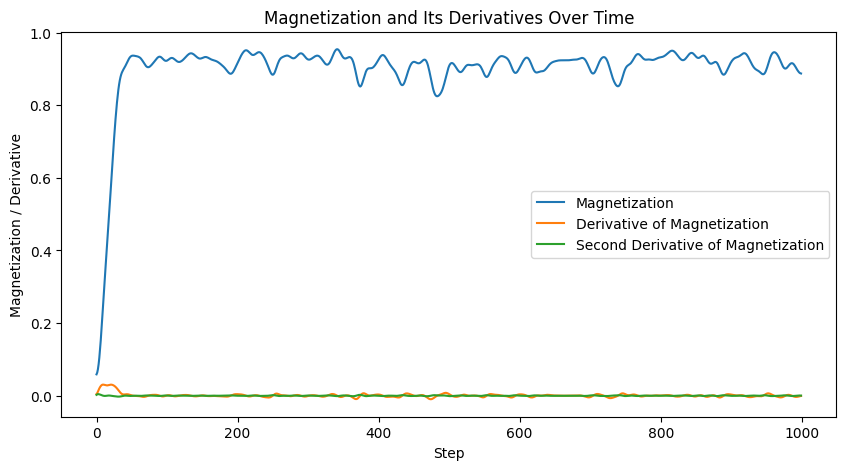

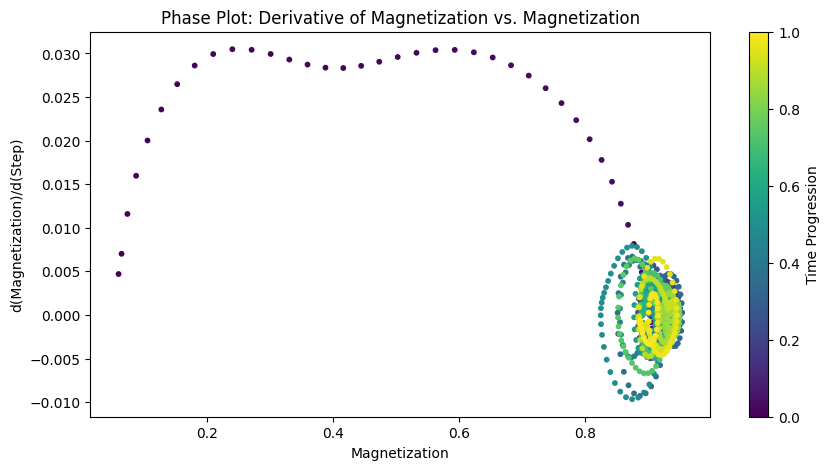

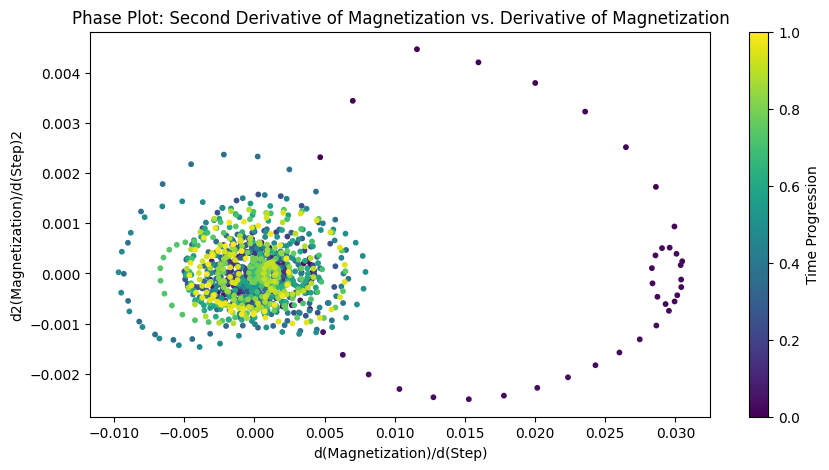

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.ndimage import gaussian_filter1d

class IsingModelSocial:
    def __init__(self, size, temperature, interaction_strength, external_field):
        self.size = size
        self.temperature = temperature
        self.interaction_strength = interaction_strength
        self.external_field = external_field
        self.spins = np.random.choice([-1, 1], size=(size, size))

    def energy(self):
        """Calculate the total energy of the system."""
        total_energy = 0
        for i in range(self.size):
            for j in range(self.size):
                spin = self.spins[i, j]
                neighbors = (
                    self.spins[(i + 1) % self.size, j] +
                    self.spins[i, (j + 1) % self.size] +
                    self.spins[(i - 1) % self.size, j] +
                    self.spins[i, (j - 1) % self.size]
                )
                total_energy -= self.interaction_strength * spin * neighbors
                total_energy -= self.external_field * spin
        return total_energy / 2  # Avoid double-counting

    def step(self):
        """Perform one Monte Carlo step."""
        for _ in range(self.size ** 2):
            i = np.random.randint(0, self.size)
            j = np.random.randint(0, self.size)
            spin = self.spins[i, j]

            # Calculate energy change if this spin is flipped
            neighbors = (
                self.spins[(i + 1) % self.size, j] +
                self.spins[i, (j + 1) % self.size] +
                self.spins[(i - 1) % self.size, j] +
                self.spins[i, (j - 1) % self.size]
            )
            delta_energy = 2 * spin * (self.interaction_strength * neighbors + self.external_field)

            # Metropolis algorithm
            if delta_energy < 0 or np.random.rand() < np.exp(-delta_energy / self.temperature):
                self.spins[i, j] *= -1

    def simulate(self, steps):
        """Run the simulation for a given number of steps."""
        snapshots = []
        magnetizations = []
        for step in range(steps):
            self.step()
            if step % 10 == 0:  # Save snapshot every 10 steps
                snapshots.append(self.spins.copy())
            # Calculate magnetization
            magnetization = np.abs(np.sum(self.spins)) / (self.size ** 2)
            magnetizations.append(magnetization)
        return snapshots, magnetizations

# Parameters
size = 20  # Size of the grid (size x size individuals)
temperature = 2.5  # Represents randomness in opinion change
interaction_strength = 1.2  # Strength of peer influence
external_field = 0.1  # Societal pressure or media influence
steps = 1000  # Number of simulation steps

# Run simulation
ising_model = IsingModelSocial(size, temperature, interaction_strength, external_field)
snapshots, magnetizations = ising_model.simulate(steps)

# Smooth magnetization and calculate its derivative
smoothed_magnetizations = gaussian_filter1d(magnetizations, sigma=5)
derivative_magnetizations = np.gradient(smoothed_magnetizations)
second_derivative_magnetizations = np.gradient(derivative_magnetizations)

# Plot magnetization
plt.figure(figsize=(10, 5))
plt.plot(smoothed_magnetizations, label="Magnetization")
plt.plot(derivative_magnetizations, label="Derivative of Magnetization")
plt.plot(second_derivative_magnetizations, label="Second Derivative of Magnetization")
plt.xlabel("Step")
plt.ylabel("Magnetization / Derivative")
plt.title("Magnetization and Its Derivatives Over Time")
plt.legend()
plt.show()

# Phase plot: Derivative of Magnetization vs. Magnetization
plt.figure(figsize=(10, 5))
colors = np.linspace(0, 1, len(smoothed_magnetizations))  # Color gradient based on time
sc = plt.scatter(smoothed_magnetizations, derivative_magnetizations, c=colors, cmap='viridis', s=10)
plt.colorbar(sc, label="Time Progression")
plt.xlabel("Magnetization")
plt.ylabel("d(Magnetization)/d(Step)")
plt.title("Phase Plot: Derivative of Magnetization vs. Magnetization")
plt.show()

plt.figure(figsize=(10, 5))
colors = np.linspace(0, 1, len(smoothed_magnetizations))  # Color gradient based on time
sc = plt.scatter(derivative_magnetizations, second_derivative_magnetizations, c=colors, cmap='viridis', s=10)
plt.colorbar(sc, label="Time Progression")
plt.xlabel("d(Magnetization)/d(Step)")
plt.ylabel("d2(Magnetization)/d(Step)2")
plt.title("Phase Plot: Second Derivative of Magnetization vs. Derivative of Magnetization")
plt.show()